Import Data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from lmfit import Model

# Load the .mqa file
path = 'C:/Natuurkunde/NSP2/Data/testmetinghelling_2.mqa' 
df = pd.read_csv(path, sep='\t', header=0)

Calculate s_0, a, t_0 and fitreport

In [8]:
# Extract time, x-position, and y-position
time = df['Time']
x_position = df['Point #1.X']
y_position = df['Point #1.Y']

# Adjust the data to start at (0, 0)
# Shift x and y so that the initial values are (0, 0)
x_position_adjusted = x_position - x_position.iloc[0]
y_position_adjusted = y_position - y_position.iloc[0]  

# Define the scaling factor (adjust values for your known measurement)
known_distance_meters = 0.94  # known distance in meters
known_distance_pixels = 1052  # known distance in pixels
scaling_factor = known_distance_meters / known_distance_pixels

# Calculate s (distance in meters) for each time
s_pixels = np.sqrt(x_position_adjusted**2 + y_position_adjusted**2)
s_meters = s_pixels * scaling_factor

# Define the theoretical function for fitting
def theoretical_s(t, s_0, a, t_0):
    return s_0 + 0.5 * a * (t-t_0)**2

# Use lmfit Model to define the model and fit the data
model = Model(theoretical_s)
params = model.make_params(s_0=0, a=1, t_0=0) # Initial guess for parameters

# Fit the model to the data
result = model.fit(s_meters, params, t=time)

# Print the fit report, which includes the fitted parameters and reduced chi-squared
print(result.fit_report())


[[Model]]
    Model(theoretical_s)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 194
    # variables        = 3
    chi-square         = 0.00161264
    reduced chi-square = 8.4432e-06
    Akaike info crit   = -2263.36132
    Bayesian info crit = -2253.55775
    R-squared          = 0.99989928
[[Variables]]
    s_0: -0.00270877 +/- 5.0775e-04 (18.74%) (init = 0)
    a:    3.07430052 +/- 0.00807526 (0.26%) (init = 1)
    t_0:  0.04055115 +/- 0.00102117 (2.52%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, t_0)   = +0.9610
    C(s_0, t_0) = +0.8018
    C(s_0, a)   = +0.6506


Plot Graph

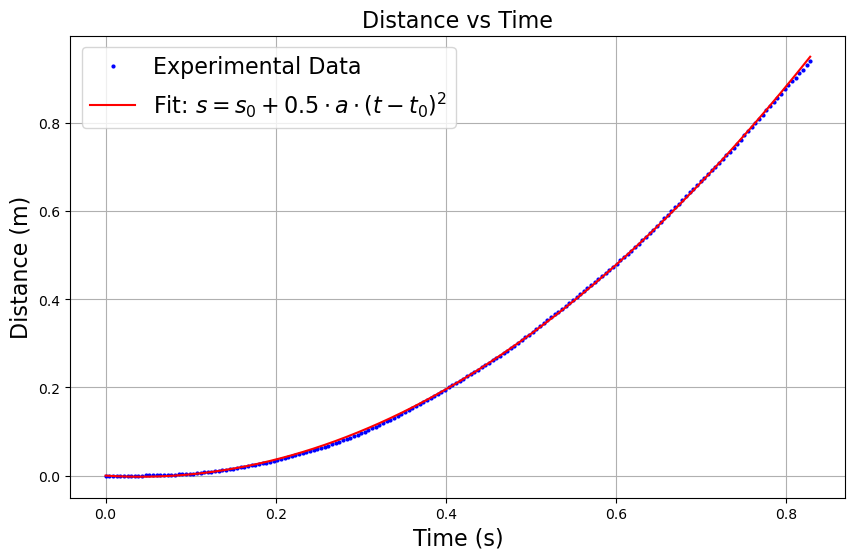

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(time, s_meters, 'bo', markersize = 2, label='Experimental Data')
plt.plot(time, result.best_fit, 'r-', label=r'Fit: $s = s_0 + 0.5 \cdot a \cdot (t - t_0)^2$')
plt.xlabel('Time (s)', fontsize = 16)
plt.ylabel('Distance (m)', fontsize = 16)
plt.title('Distance vs Time', fontsize = 16)
plt.legend(fontsize = 16)
plt.grid()
plt.show()
